In [1]:
import pandas as pd

In [2]:
!pip freeze


beautifulsoup4==4.11.1
certifi==2022.9.24
charset-normalizer==2.1.1
idna==3.4
requests==2.28.1
soupsieve==2.3.2.post1
urllib3==1.26.12


In [3]:
df = pd.read_csv('../data/countries.csv')

In [4]:
df

,country name,ruling party,url,position
0,Afghanistan,No Parties,NaN,NaN
1,Abkhazia,Independents,NaN,NaN
2,Åland,Åland Centre,/wiki/%C3%85land_Centre,Centre
3,Albania,Socialist Party of Albania,/wiki/Socialist_Party_of_Albania,Centre-left
4,Alderney,No Parties,NaN,NaN
...,...,...,...,...
248,Wallis and Futuna,No Parties,NaN,NaN
249,Western Sahara,Polisario Front,/wiki/Polisario_Front,Centre-left
250,Yemen,General People's Congress (Yemen),/wiki/General_People%27s_Congress_(Yemen),Centre
251,Zambia,United Party for National Development,/wiki/United_Party_for_National_Development,Centre


In [8]:
df.position.unique()

array([nan, 'Centre', 'Centre-left', 'Big tent', 'Centre-right',
       'Left-wing', 'Center-left', 'Far-left', 'Center', 'Right-wing'],
      dtype=object)

In [24]:
df.loc[:, 'position_encoded_3'] = df.position.apply(lambda x: {'Centre': 0 , 'Centre-left': -1 , 'Big tent': 0, 'Centre-right': 1,
       'Left-wing': -1, 'Center-left': -1, 'Far-left': -1, 'Center': 0, 'Right-wing': 1}.get(x, -10))

In [25]:
df

,country name,ruling party,url,position,position_encoded_3
0,Afghanistan,No Parties,NaN,NaN,-10
1,Abkhazia,Independents,NaN,NaN,-10
2,Åland,Åland Centre,/wiki/%C3%85land_Centre,Centre,0
3,Albania,Socialist Party of Albania,/wiki/Socialist_Party_of_Albania,Centre-left,-1
4,Alderney,No Parties,NaN,NaN,-10
...,...,...,...,...,...
248,Wallis and Futuna,No Parties,NaN,NaN,-10
249,Western Sahara,Polisario Front,/wiki/Polisario_Front,Centre-left,-1
250,Yemen,General People's Congress (Yemen),/wiki/General_People%27s_Congress_(Yemen),Centre,0
251,Zambia,United Party for National Development,/wiki/United_Party_for_National_Development,Centre,0


array([[<AxesSubplot:title={'center':'position_encoded_3'}>]],
      dtype=object)

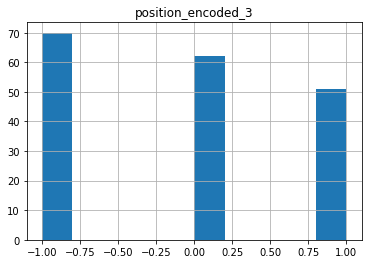

In [27]:
df[df['position_encoded_3'] != -10].hist()

In [28]:
df_2 = df.copy()

In [35]:
df_2.position = df_2.position.sort_values().reset_index(drop=True)

## 

In [40]:
df_comp = df_2 == df

In [42]:
df_comp.sum()

country name          253
ruling party          253
url                   209
position               28
position_encoded_3    253
dtype: int64

In [43]:
import datetime


In [51]:
str(datetime.datetime.now().date())

'2022-11-16'